### Setting up the environment:

In [15]:
#1# Importing libraries: 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

RSEED=42

### base model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#2# Visualizing the dataset:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Exploring the data:

In [16]:
df_fraud = pd.read_csv('./data/Merge_Frauddet_new.csv')


In [17]:
df_fraud["reading_remarque"].unique()

array([8, 6, 9, 7], dtype=int64)

In [18]:
df_fraud.describe()

,ID,tarif_type,counter_number,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,client_catg,region,target
count,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000
mean,103836.467,20.136,120919976164.004,0.042,7.315,1.000,409.745,107.568,20.413,54.060,46.322,11.987,209.995,0.767
std,32065.556,13.482,1646702365322.078,0.375,1.360,0.083,588.275,1169.328,163.644,979.218,2594.754,6.159,103.552,2.661
min,0.000,8.000,0.000,0.000,6.000,0.000,0.000,0.000,0.000,0.000,1.000,11.000,101.000,0.000
25%,104718.000,11.000,121473.000,0.000,6.000,1.000,79.000,0.000,0.000,0.000,4.000,11.000,103.000,0.000
50%,112518.000,11.000,490475.000,0.000,6.000,1.000,272.000,0.000,0.000,0.000,4.000,11.000,301.000,0.000
75%,120486.000,40.000,1112725.000,0.000,9.000,1.000,601.000,0.000,0.000,0.000,4.000,11.000,308.000,0.000
max,128439.000,45.000,27381100000000.000,5.000,9.000,50.000,98889.000,819886.000,45360.000,343568.000,294406.000,51.000,399.000,10.000


In [19]:
#add a new colum with total consumption level
df_fraud.eval('sum_consu = consommation_level_1 + consommation_level_2 + consommation_level_3 + consommation_level_4',inplace=True)

### Adjusting the data: 

In [20]:
#1# Checking for missing values: According with the documentation, the data has no NaN values:

df_fraud.isnull().sum()
# The Data is complete. 

ID                      0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
months_number           0
counter_type            0
client_catg             0
region                  0
creation_date           0
target                  0
sum_consu               0
dtype: int64

In [21]:
#2# Getting the Dummies for X_train: 

#X_train = pd.get_dummies(data=X_train, columns=["counter_statue", "client_catg", "reading_remarque"], dtype=float)
#X_train.info()

categorical_columns= ['counter_statue', 'reading_remarque','client_catg']
df_fraud_dummy = pd.get_dummies(df_fraud, columns=categorical_columns, drop_first=True, dtype=int)
df_fraud_dummy

,ID,invoice_date,tarif_type,counter_number,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,...,counter_statue_1,counter_statue_2,counter_statue_3,counter_statue_4,counter_statue_5,reading_remarque_7,reading_remarque_8,reading_remarque_9,client_catg_12,client_catg_51
0,0,24/03/2014,11,1335667.000,1,82,0,0,0,4,...,0,0,0,0,0,0,1,0,0,0
1,0,29/03/2013,11,1335667.000,1,1200,184,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,0,23/03/2015,11,1335667.000,1,123,0,0,0,4,...,0,0,0,0,0,0,1,0,0,0
3,0,13/07/2015,11,1335667.000,1,102,0,0,0,4,...,0,0,0,0,0,0,1,0,0,0
4,0,17/11/2016,11,1335667.000,1,572,0,0,0,12,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,128439,26/06/2007,40,42475.000,1,106,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1048571,128439,24/10/2007,11,464740.000,1,476,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1048572,128439,06/05/2015,40,42475.000,1,63,0,0,0,4,...,0,0,0,0,0,0,1,0,0,0
1048573,128439,06/05/2015,11,464740.000,1,459,0,0,0,4,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# possible baseline models
# coefficient vs which consumption level the client is 
##

In [23]:
#2# Adjusting the data type:

#A# Changed the type of the categorical data from int64 to categorical:
df_fraud_dummy= df_fraud_dummy.astype({"counter_statue_1": "category","counter_statue_2": "category","counter_statue_3": "category","counter_statue_4": "category","counter_statue_5": "category", "counter_type": 'category', 'reading_remarque_7': 'category', "reading_remarque_8" : "category", "reading_remarque_9" : "category", "client_catg_12" : "category", "client_catg_51" : "category",'target': 'category'})

#B# # Changed invoice_date and creation_date to date formate:
df_fraud_dummy['invoice_date'] = pd.to_datetime(df_fraud_dummy['invoice_date'])
df_fraud_dummy['creation_date'] = pd.to_datetime(df_fraud_dummy['creation_date'])
df_fraud_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID                    1048575 non-null  int64         
 1   invoice_date          1048575 non-null  datetime64[ns]
 2   tarif_type            1048575 non-null  int64         
 3   counter_number        1048575 non-null  float64       
 4   counter_coefficient   1048575 non-null  int64         
 5   consommation_level_1  1048575 non-null  int64         
 6   consommation_level_2  1048575 non-null  int64         
 7   consommation_level_3  1048575 non-null  int64         
 8   consommation_level_4  1048575 non-null  int64         
 9   months_number         1048575 non-null  int64         
 10  counter_type          1048575 non-null  category      
 11  region                1048575 non-null  int64         
 12  creation_date         1048575 non-null  da

In [24]:
# changed value target from 10 to 1 
# changed strings to cate (ELEC= 0 and Gas =1)

df_fraud_dummy["target"].replace(10, 1, inplace=True)
df_fraud_dummy["counter_type"].replace("ELEC", 0 ,inplace=True)
df_fraud_dummy["counter_type"].replace("GAZ", 1 ,inplace=True)


In [25]:
df_cons = df_fraud_dummy.drop(['ID', 'invoice_date', 'counter_number','counter_type', 'region','creation_date', 'counter_statue_1',
       'counter_statue_2', 'counter_statue_3', 'counter_statue_4',
       'counter_statue_5', 'reading_remarque_7', 'reading_remarque_8',
       'reading_remarque_9'],axis=1)

In [26]:
df_fraud_dummy.drop(['ID', 'invoice_date', 'counter_number', 'creation_date'],axis=1 ,inplace=True)

In [27]:
df_fraud_dummy.head()

,tarif_type,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,counter_type,region,target,...,counter_statue_1,counter_statue_2,counter_statue_3,counter_statue_4,counter_statue_5,reading_remarque_7,reading_remarque_8,reading_remarque_9,client_catg_12,client_catg_51
0,11,1,82,0,0,0,4,0,101,0,...,0,0,0,0,0,0,1,0,0,0
1,11,1,1200,184,0,0,4,0,101,0,...,0,0,0,0,0,0,0,0,0,0
2,11,1,123,0,0,0,4,0,101,0,...,0,0,0,0,0,0,1,0,0,0
3,11,1,102,0,0,0,4,0,101,0,...,0,0,0,0,0,0,1,0,0,0
4,11,1,572,0,0,0,12,0,101,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
y = df_fraud_dummy['target']
X = df_fraud_dummy.drop('target', axis=1)

X_train_d , X_test_d , y_train_d , y_test_d = train_test_split(X,y, stratify=y, random_state=RSEED)

print('X_train shape:', X_train_d.shape)
print('X_test shape:', X_test_d.shape)
print('y_train shape:', y_train_d.shape)
print('y_test shape:', y_test_d.shape)

X_train shape: (786431, 20)
X_test shape: (262144, 20)
y_train shape: (786431,)
y_test shape: (262144,)


In [29]:
df_fraud_dummy.head()

,tarif_type,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,counter_type,region,target,...,counter_statue_1,counter_statue_2,counter_statue_3,counter_statue_4,counter_statue_5,reading_remarque_7,reading_remarque_8,reading_remarque_9,client_catg_12,client_catg_51
0,11,1,82,0,0,0,4,0,101,0,...,0,0,0,0,0,0,1,0,0,0
1,11,1,1200,184,0,0,4,0,101,0,...,0,0,0,0,0,0,0,0,0,0
2,11,1,123,0,0,0,4,0,101,0,...,0,0,0,0,0,0,1,0,0,0
3,11,1,102,0,0,0,4,0,101,0,...,0,0,0,0,0,0,1,0,0,0
4,11,1,572,0,0,0,12,0,101,0,...,0,0,0,0,0,0,0,1,0,0


### Data Visualization - Plots:

In [30]:
#sns.lineplot(data=df_fraud, x = 'counter_coefficient', y ='sum_consu')

In [31]:
#sns.barplot(data=df_fraud, x="counter_statue", y="sum_consu")

In [32]:
#sns.barplot(data=df_fraud, x="counter_coefficient", y="sum_consu")

In [33]:
#sns.boxplot(data=df_fraud, x="counter_coefficient", y="sum_consu")
#  having a very high coefficinet for consumption (10,20,33) while the sum of consumptuion is very low might be a indicator for counter manulatplation 
# using 10 times or more the standard coefficient should lead to at least 5X consumptuion 
 

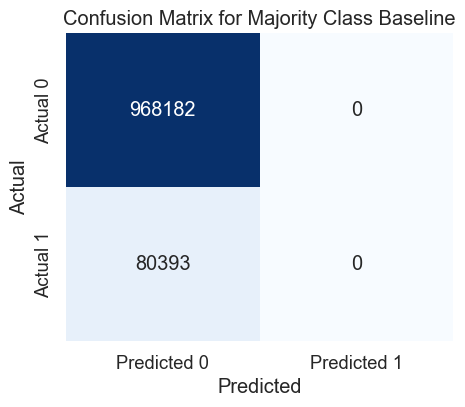

In [34]:
# first Basemodel (majority class)

from sklearn.metrics import confusion_matrix

# Get the majority class
majority_class = df_fraud_dummy['target'].value_counts().idxmax()  

# Create predictions array filled with majority class label
predictions_majority = [majority_class] * len(df_fraud_dummy)



cm = confusion_matrix(df_fraud_dummy["target"], predictions_majority)

# Create a heatmap to visualize the confusion matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Majority Class Baseline")
plt.show()


In [35]:
# Second Basemodel (logistic_regression, no scale)
logistic_regression = LogisticRegression(class_weight='balanced')
logistic_regression.fit(X_train_d, y_train_d)
y_pred_d = logistic_regression.predict(X_test_d)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test_d, y_pred_d))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.47      0.62    242046
           1       0.08      0.59      0.15     20098

    accuracy                           0.48    262144
   macro avg       0.51      0.53      0.39    262144
weighted avg       0.87      0.48      0.59    262144



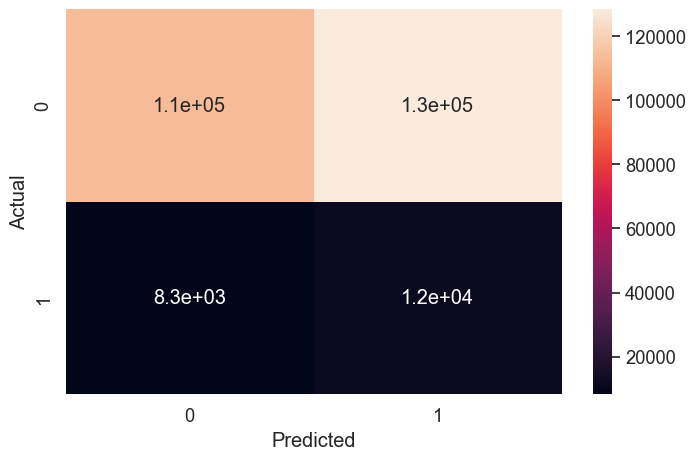

In [36]:
conf_matrix= pd.crosstab(y_test_d, y_pred_d, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True);

In [40]:
# Second Basemodel (logistic_regression, scaled)
scaler = MinMaxScaler()
X_train_d_scaled = scaler.fit_transform(X_train_d)
X_test_d_scaled = scaler.transform(X_test_d)

# Train a logistic regression model
logistic_regression = LogisticRegression(class_weight='balanced')
logistic_regression.fit(X_train_d_scaled, y_train_d)

# Predict on the test set
y_pred_d = logistic_regression.predict(X_test_d_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test_d, y_pred_d))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.78    242046
           1       0.09      0.40      0.15     20098

    accuracy                           0.66    262144
   macro avg       0.51      0.54      0.47    262144
weighted avg       0.87      0.66      0.74    262144



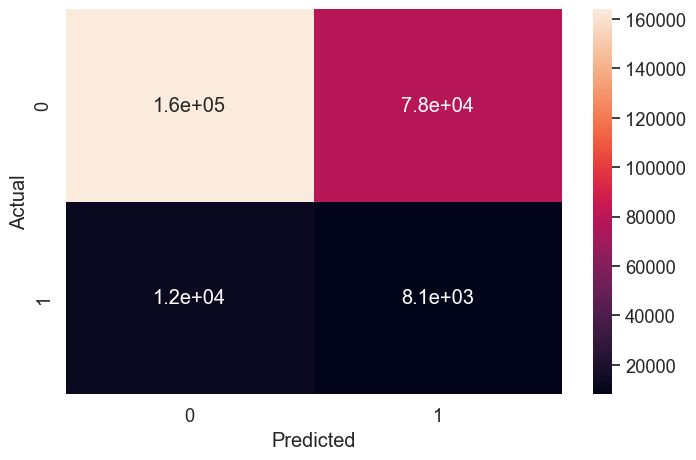

In [41]:
conf_matrix= pd.crosstab(y_test_d, y_pred_d, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True);

In [ ]:
##

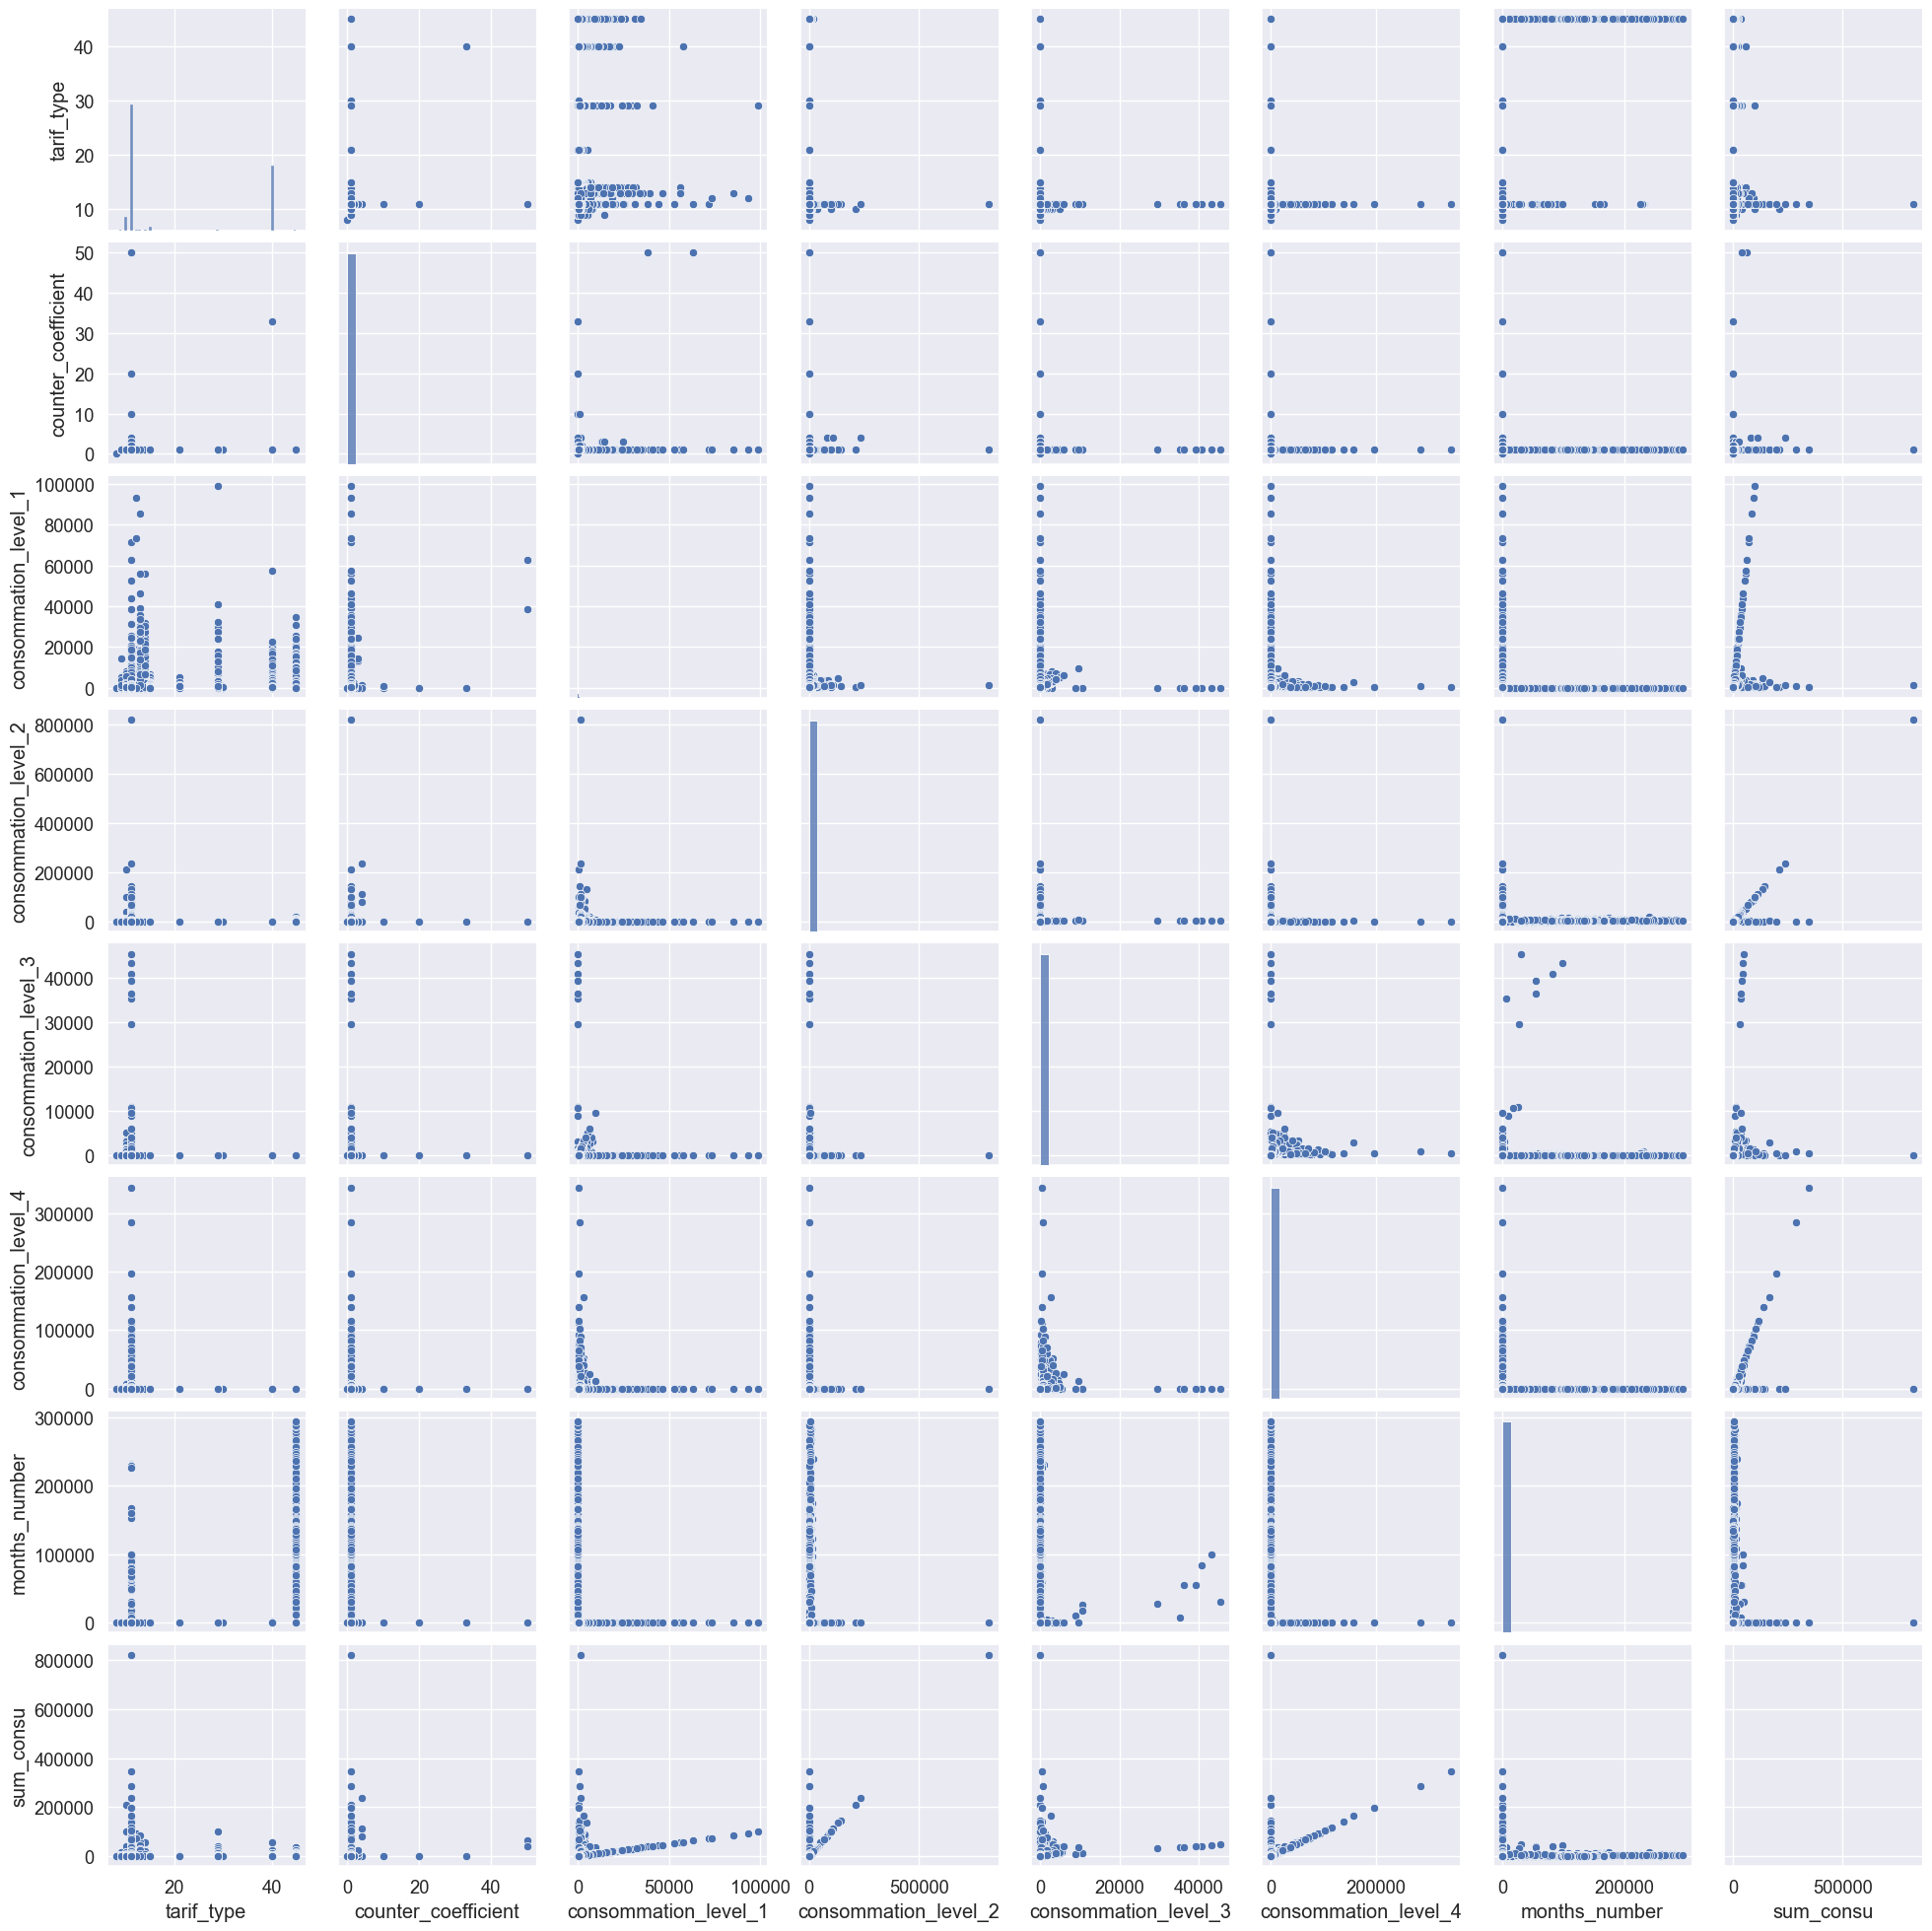

In [ ]:
sns.pairplot(df_cons)


In [ ]:
y_C= df_cons['target']
X_C = df_cons.drop('target', axis=1)

X_train_C , X_test_C , y_train_C , y_test_C = train_test_split(X_C,y_C, stratify=y, random_state=RSEED)

print('X_train shape:', X_train_C.shape)
print('X_test shape:', X_test_C.shape)
print('y_train shape:', y_train_C.shape)
print('y_test shape:', y_test_C.shape)

X_train shape: (786431, 10)
X_test shape: (262144, 10)
y_train shape: (786431,)
y_test shape: (262144,)


In [ ]:
# Basemodel (logistic_regression, no scale)
logistic_regression = LogisticRegression(class_weight='balanced')
logistic_regression.fit(X_train_C, y_train_C)
y_pred_C = logistic_regression.predict(X_test_C)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test_C, y_pred_C))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76    242046
           1       0.09      0.42      0.14     20098

    accuracy                           0.62    262144
   macro avg       0.51      0.53      0.45    262144
weighted avg       0.86      0.62      0.71    262144



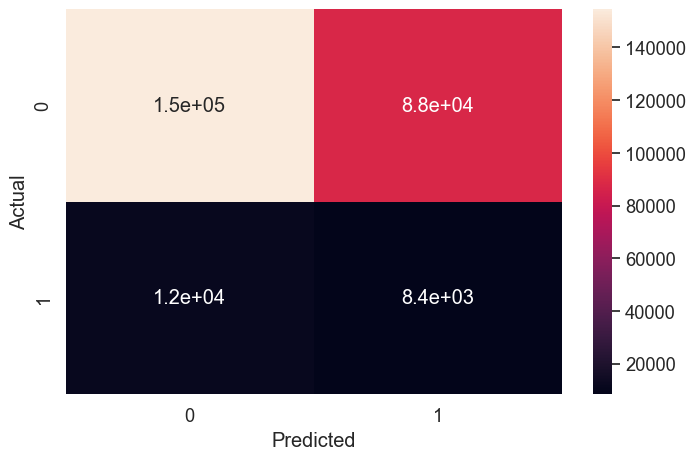

In [ ]:
conf_matrix= pd.crosstab(y_test_C, y_pred_C, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True);